### Set up

In [1]:
import os 
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src/exploratory_notebooks'

In [2]:
os.chdir('../')
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/risque_multifreq/projet/src'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from production_code import constants

### Data

In [4]:
signal = pd.read_excel('data/eurusd.xlsx')

In [5]:
signal.sort_values(by='Date', inplace=True)
signal.set_index('Date', inplace=True)
signal = signal.loc[(signal.index <= constants.NON_POW_END_DATE) &
                   (signal.index >= constants.NON_POW_START_DATE)]

In [6]:
signal.head()

,PX_LAST
Date,
2007-01-01,1.3201
2007-01-02,1.3273
2007-01-03,1.3169
2007-01-04,1.3084
2007-01-05,1.3002


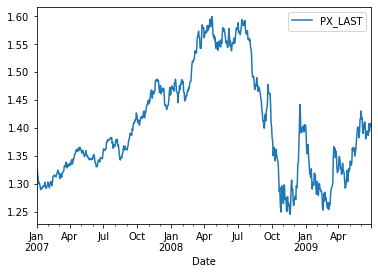

In [7]:
signal.plot()

In [8]:
signal = signal["PX_LAST"].to_numpy()

### Haar wavelet class

In [9]:
from production_code.wvHaar import Haar

In [10]:
haar = Haar(signal)
j = -4

In [11]:
_ = haar.waveletTransform(j)

In [12]:
_ = haar.waveletDetailSignal(j)

In [13]:
detailSignalJ = haar.getDetailSignalJ(j)

In [14]:
waveletTransformJ = haar.getWaveletTransformJ(j)

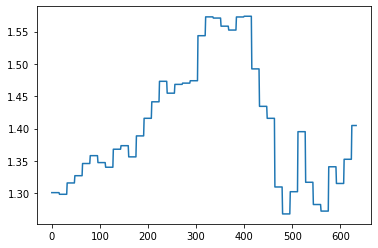

In [15]:
plt.plot(detailSignalJ)

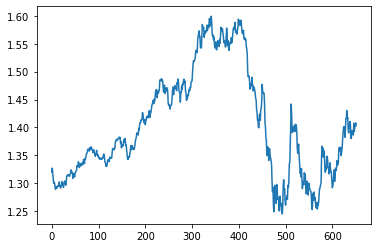

In [16]:
plt.plot(signal)

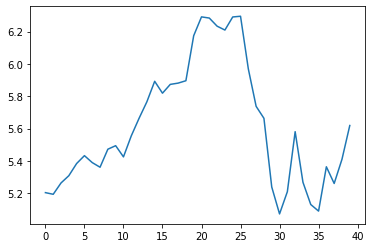

In [17]:
plt.plot(waveletTransformJ)

### Study effects of j

In [18]:
allJs = [j for j in range(-4,0) if j != 0]

In [19]:
allJs

[-4, -3, -2, -1]

In [20]:
_ = [haar.waveletTransform(j) for j in allJs]

In [21]:
_ = [haar.waveletDetailSignal(j) for j in allJs]

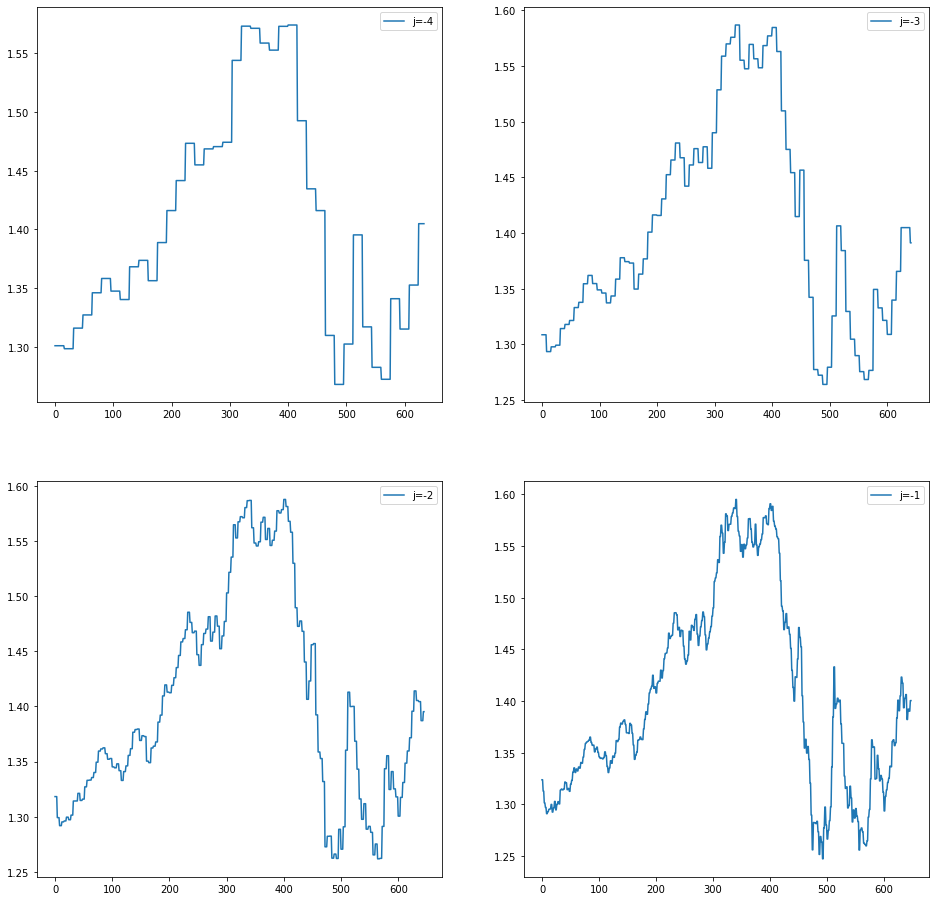

In [22]:
fig, axes = plt.subplots(2,2, figsize=(16,16))
axs = np.array(axes).reshape(-1)
for i in range(0,4):
    axs[i].plot(haar.getDetailSignalJ(i-4), label=f'j={i-4}')
    axs[i].legend()

#### Reconstruct signal

In [35]:
reconstructedSignal = np.zeros(len(haar.waveletDetailSignal(-1)))

In [36]:
for j in range(-4, 0):
    print(f"j = {j}, length = {len(haar.waveletDetailSignal(j))}")

j = -4, length = 652
j = -3, length = 652
j = -2, length = 652
j = -1, length = 652


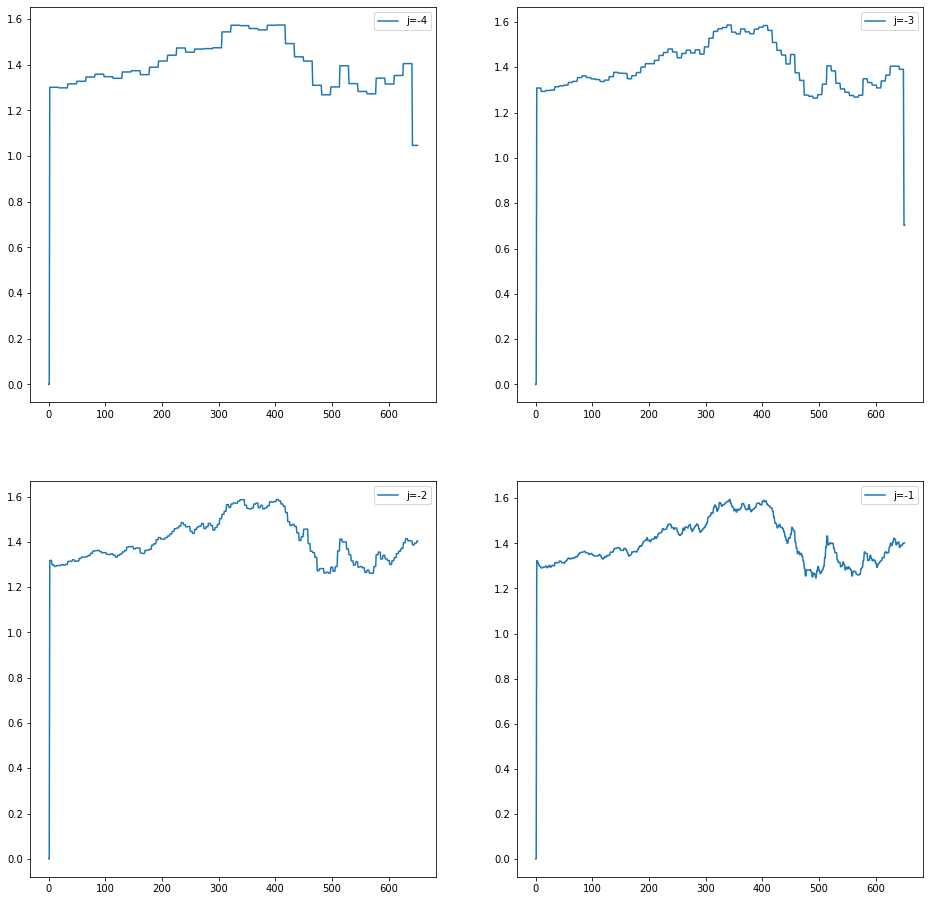

In [37]:
fig, axes = plt.subplots(2,2, figsize=(16,16))
axs = np.array(axes).reshape(-1)
for i in range(0,4):
    axs[i].plot(haar.waveletDetailSignal(i-4), label=f'j={i-4}')
    axs[i].legend()

In [38]:
for i in range(-4, 0):
    reconstructedSignal += haar.waveletDetailSignal(i)

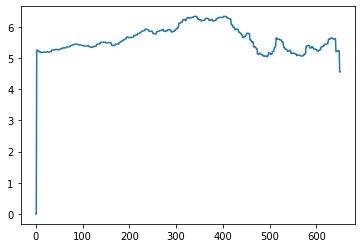

In [39]:
plt.plot(reconstructedSignal)

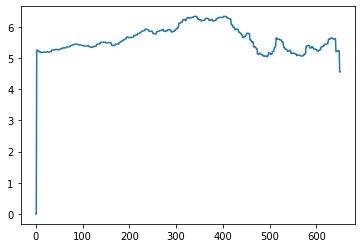

In [44]:
plt.plot(reconstructedSignal)

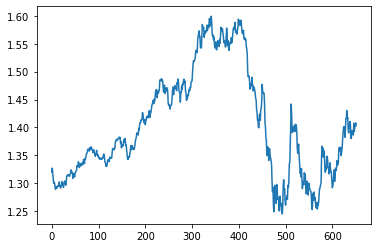

In [42]:
plt.plot(signal)

In [43]:
print(len(signal))
print(len(reconstructedSignal))

652
652
